In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import sys
sys.path.append('src/')


import numpy as np
import matplotlib.pyplot as plt


from loguru import logger

from WADParser import open_wad_file
from WADViewer import WadViewer
from WADPlayer import MIDIPlayer
from mus2mid import Mus2Mid

In [15]:
w = open_wad_file('WADs/brigandine.wad')

2025-04-03 19:13:11.724 | INFO     | WADParser:__init__:41 - Found a DOOM PWAD.
2025-04-03 19:13:11.725 | INFO     | WADParser:_get_palette:116 - Palette extracted.
2025-04-03 19:13:11.726 | INFO     | WADParser:_parse_levels:156 - Found 1 level(s) in this WAD.
2025-04-03 19:13:11.727 | INFO     | WADParser:_parse_things:128 - DOOM THINGS loaded.
2025-04-03 19:13:11.856 | INFO     | WADParser:_parse_by_markers:168 - No FLATS found in this WAD.
2025-04-03 19:13:11.858 | INFO     | WADParser:_parse_by_markers:168 - No SPRITES found in this WAD.
2025-04-03 19:13:11.862 | INFO     | WADParser:_gather_textures:309 - Found 443 textures in 2 texture lumps.
2025-04-03 19:13:11.864 | INFO     | WADParser:_gather_musics:321 - Found 1 music lumps.


In [16]:
viewer = WadViewer(w)

2025-04-03 19:14:12.986 | INFO     | WADViewer:draw_map:92 - Plotted map MAP01.


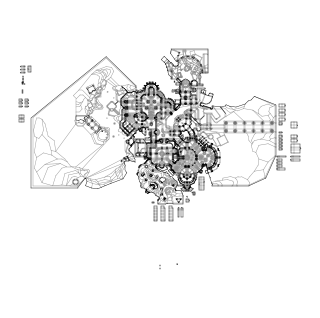

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
viewer.draw_map('MAP01', palette='OMGIFOL', show_secret=False, ax=ax)

In [60]:
def filter_flags_by_bit(flags, bit_position):
    """
    Returns the indices of flags where the given bit_position is set to 1.
    
    :param flags: NumPy array of integers representing linedef flags.
    :param bit_position: Bit position to check (0-based).
    :return: NumPy array of indices where the bit is set.
    """
    flags = np.asarray(flags, dtype=np.uint16)  # Ensure flags are in a NumPy array
    mask = (flags & (1 << bit_position)) != 0  # Check if the selected bit is set
    return np.where(mask)[0]  # Get indices where the condition is True

# Example usage
flags_array = np.array([0b101011, 0b1100, 0b100000, 0b001000, 0b000100])  # Example linedefs
bit_to_check = 3  # Check if bit 3 is set

indices = filter_flags_by_bit(flags_array, bit_to_check)
print(indices)  # Output: [1 3]

[0 1 3]


In [ ]:
w.save_mus('D_E1M3')
m2m = Mus2Mid('output/D_E1M3.mus')
m2m.to_midi('output/D_E1M3.mid')


2025-03-30 20:44:45.024 | INFO     | mus2mid:__init__:70 - File format: b'MUS\x1a'
2025-03-30 20:44:45.042 | INFO     | mus2mid:mus2mid:217 - Track size written: 30033 vs 19246
2025-03-30 20:44:45.043 | INFO     | mus2mid:to_midi:223 - Exported MUS output/D_E1M3.mus as a MIDI file to output/D_E1M3.mid.


In [ ]:
player = MIDIPlayer('output/D_E1M3.mid')
player.play()

In [ ]:
player.stop()

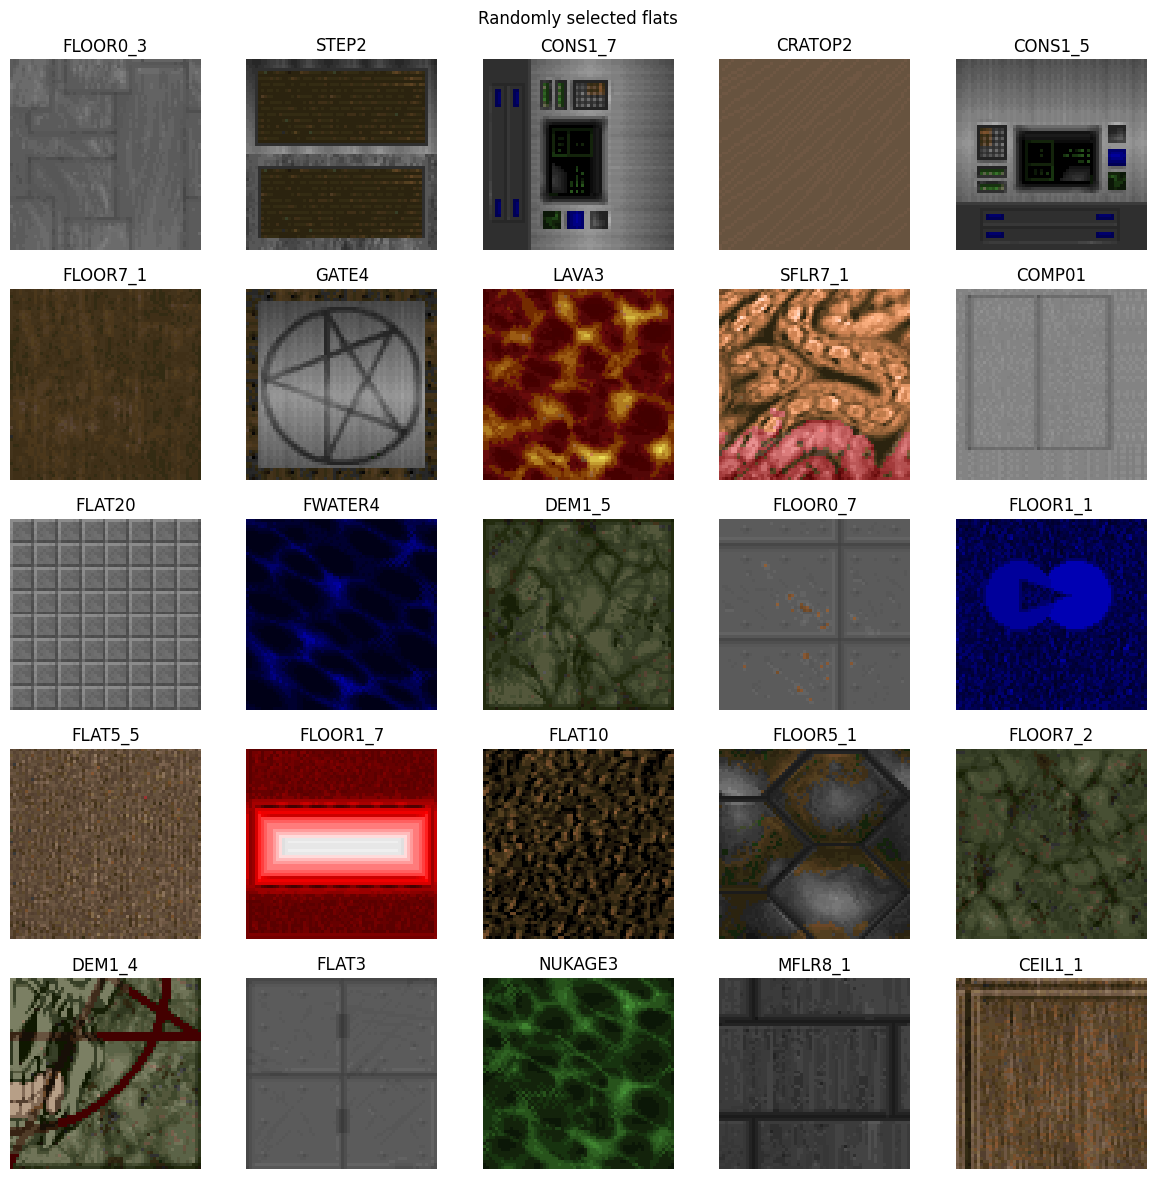

In [6]:
n_flats = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_flat_names = list(w.flats.keys())
selected_flats = np.random.choice(all_flat_names, size=n_flats, replace=False)

for i, flat_name in enumerate(selected_flats):

    viewer.draw_flat(flat_name, ax=ax[i])
    ax[i].set_title(flat_name)
    ax[i].axis('off')

fig.suptitle('Randomly selected flats')
fig.tight_layout(pad=1.2)

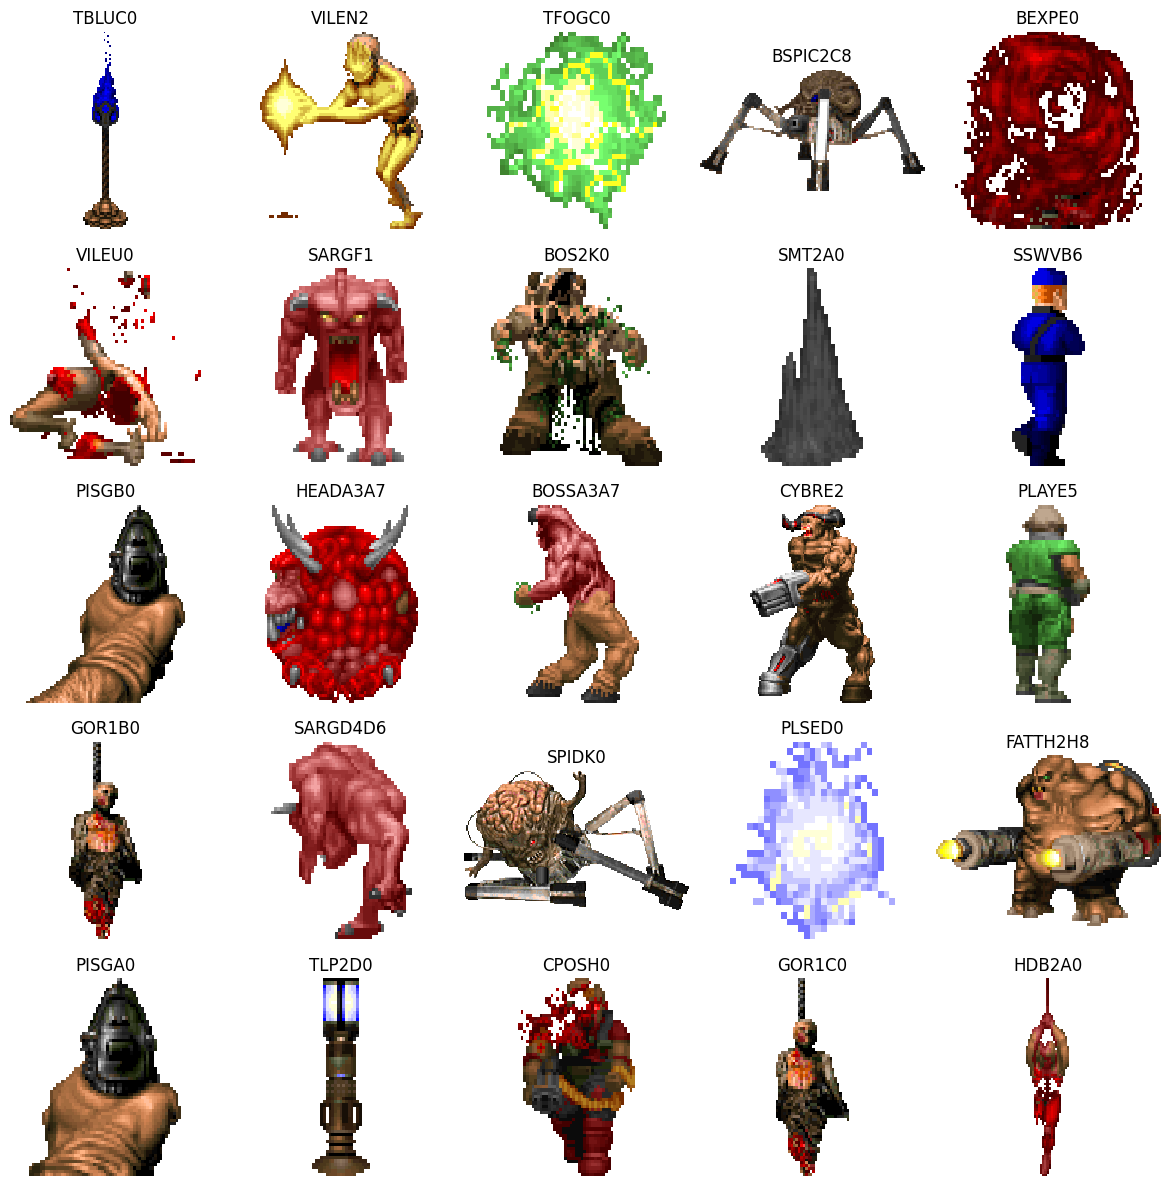

In [6]:
n_sprites = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_sprite_names = list(w.sprites.keys())
selected_sprites = np.random.choice(all_sprite_names, size=n_sprites, replace=False)

for i, sprite_name in enumerate(selected_sprites):

    rgb_image = w.draw_patch(*w.sprites[sprite_name])

    # Original DOOM had non-square pixels!
    ax[i].imshow(rgb_image / 255, aspect=1.2, interpolation='nearest') 
    ax[i].set_title(sprite_name)
    ax[i].axis('off')

fig.tight_layout(pad=1.2)

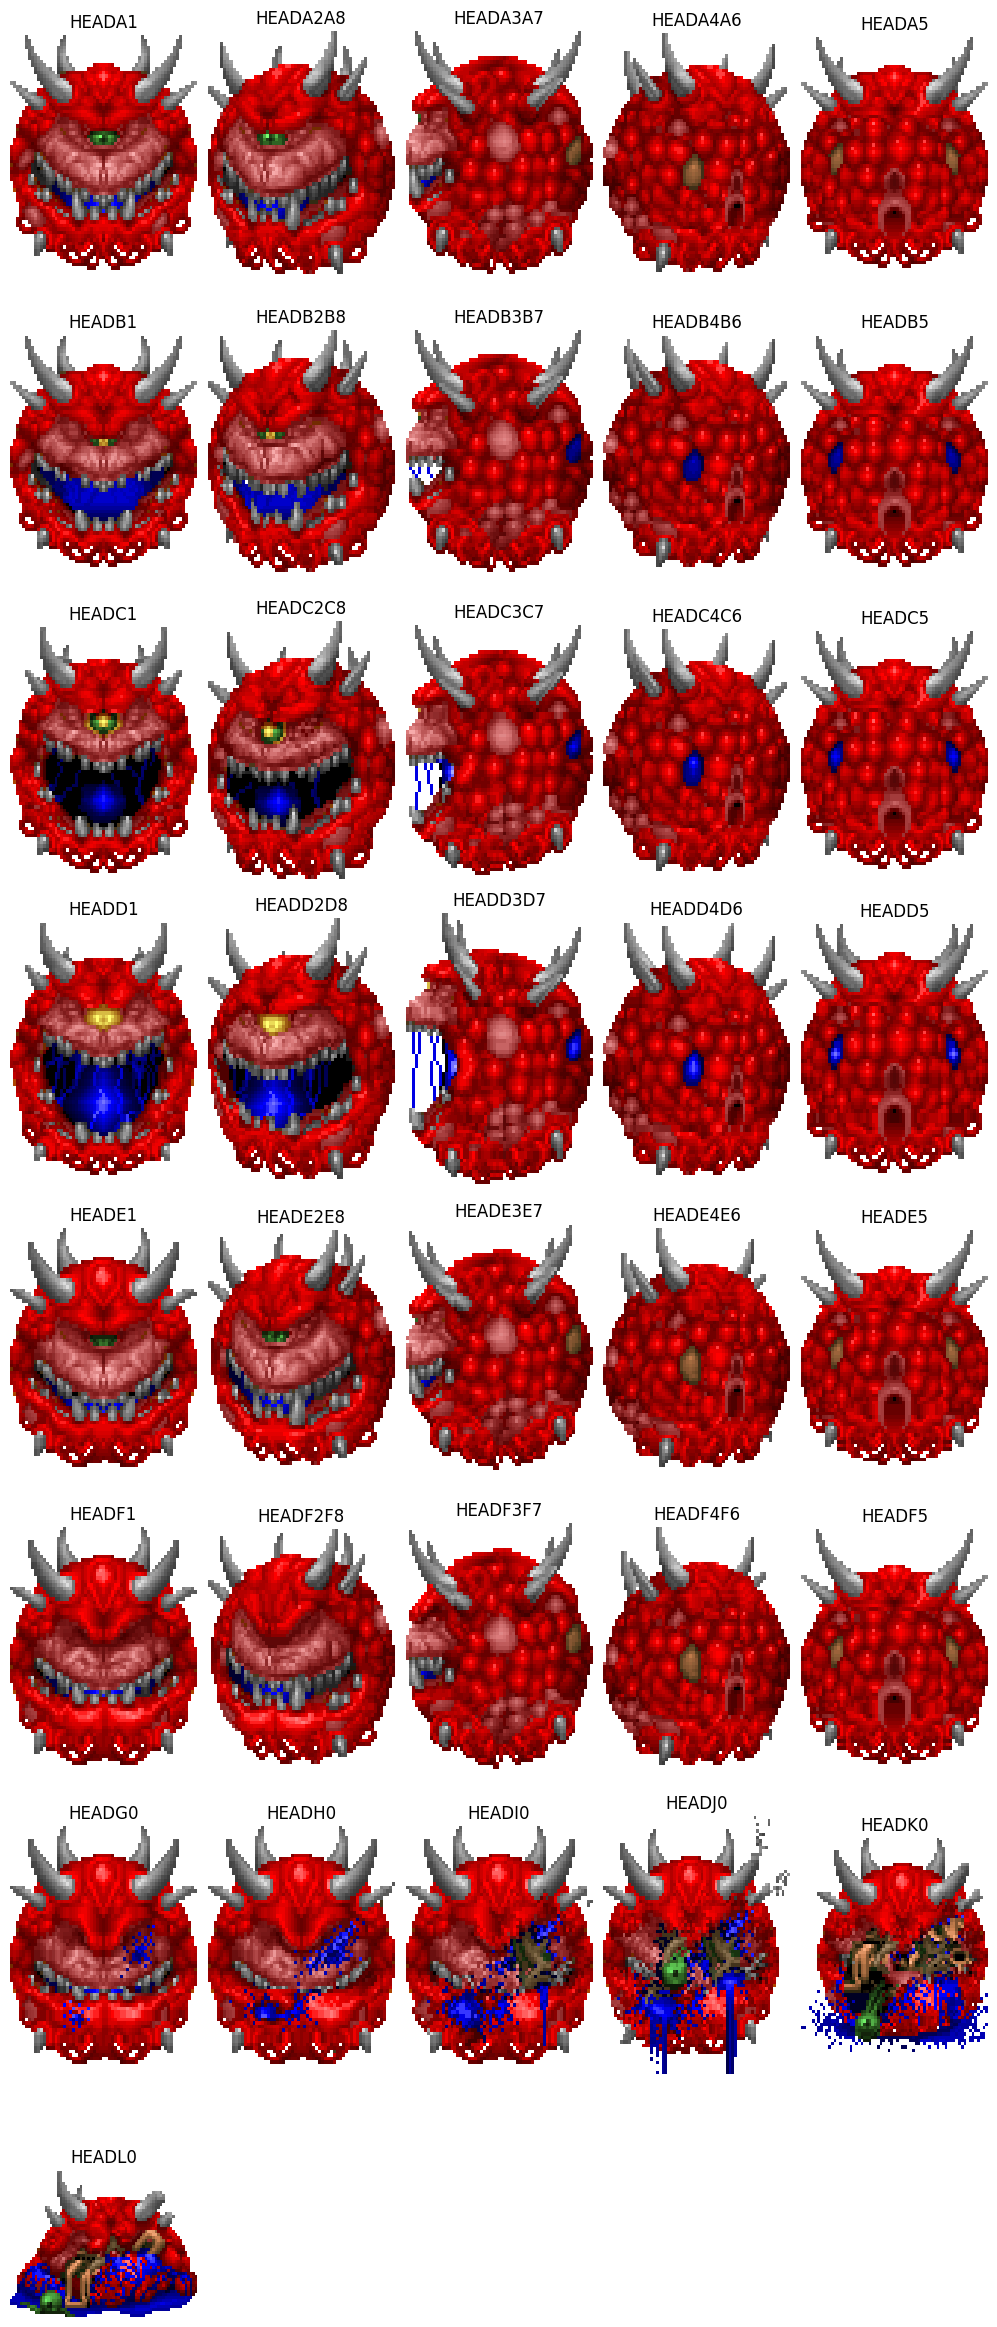

In [7]:
sprite_name = 'HEAD'

sprite_list = w.spritesheets[sprite_name]
ncols=5
nrows = int(np.ceil(len(sprite_list) / ncols))

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 3*nrows))
ax = ax.ravel()

for i, (name, offset, size) in enumerate(sprite_list):
    
    rgb_image = w.draw_patch(offset, size)
    ax[i].imshow(rgb_image / 255, aspect=1.2, interpolation='nearest')
    ax[i].set_title(name)
    ax[i].axis('off')

[ax[i].set_visible(False) for i in range(len(sprite_list), len(ax))]
fig.tight_layout(pad=0.8)